In [1]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import *
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#!pip install pandas --upgrade
import math
import sys
%matplotlib inline
sns.set()
sys.path.append('../method/')
import dataset as ds
import preprocessing as pp
import machine_algorithm as ma


In [2]:
# プロット
d_test = ds.load_data("/Users/e185716/研究/R/ei_make/event_test.csv")
d_test['date'] = pd.to_datetime(d_test['date'])


# 'date_column'列をインデックスとして設定
d_test.set_index('date', inplace=True)

In [5]:
non_ei = ds.load_data("/Users/e185716/グラフ練習2/特徴ベクトル/FV4/ei_non/pred.csv")
ei_0 = ds.load_data("/Users/e185716/グラフ練習2/特徴ベクトル/FV4/ei_1/pred.csv")
ei_min = ds.load_data("/Users/e185716/グラフ練習2/特徴ベクトル/FV4/ei_error_min/pred.csv")


In [6]:
non_ei['date'] = pd.to_datetime(non_ei['date'])
ei_0['date'] = pd.to_datetime(ei_0['date'])
ei_min['date'] = pd.to_datetime(ei_min['date'])


# 'date_column'列をインデックスとして設定
non_ei.set_index('date', inplace=True)
ei_0.set_index('date', inplace=True)
ei_min.set_index('date', inplace=True)

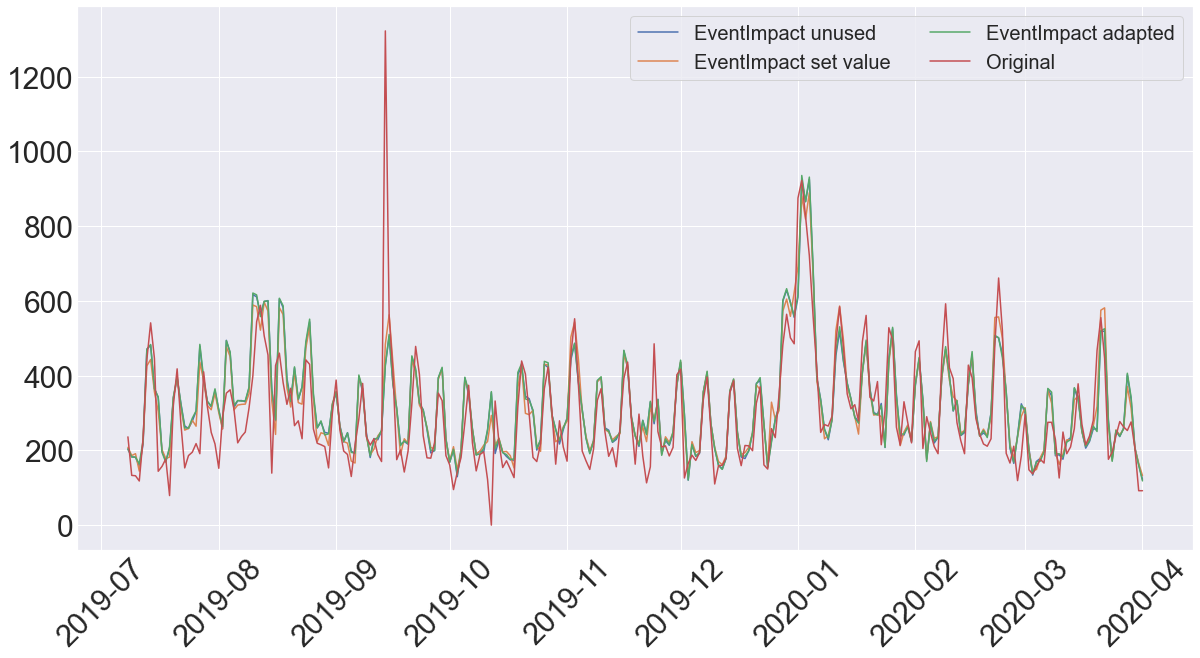

In [8]:
import datetime
import os


FV_list = ["FV1","FV2","FV3","FV4"]
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(non_ei["prediction"], label='EventImpact unused')
plt.plot(ei_0["prediction"], label='EventImpact set value')
plt.plot(ei_min["prediction"], label='EventImpact adapted')

plt.plot(d_test["CustNum"],label='Original')


plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)

save_dir_name = "/Users/e185716/Documents/2_修士/修論/k228583-master/figs_m2/shinsayou/"
os.makedirs(save_dir_name, exist_ok=True)
save_file_name = save_dir_name + "aaa" + ".png"
fig.savefig(save_file_name,bbox_inches="tight")